In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [2]:
df_lst = pd.read_csv('../data/listings.csv')

In [3]:
df_lst.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url   

## Handpicking my Y-label

In [4]:
df_lst.loc[df_lst['host_location'] != 'Denver, Colorado, United States', ['listing_url']][141:200]

,listing_url
1203,https://www.airbnb.com/rooms/15872243
1205,https://www.airbnb.com/rooms/15874051
1206,https://www.airbnb.com/rooms/15897404
1208,https://www.airbnb.com/rooms/15912228
1210,https://www.airbnb.com/rooms/15936910
1241,https://www.airbnb.com/rooms/16172759
1247,https://www.airbnb.com/rooms/16208547
1261,https://www.airbnb.com/rooms/16289371
1262,https://www.airbnb.com/rooms/16299174
1263,https://www.airbnb.com/rooms/16299372


## Looking over columns to see which I want to include in the data set

In [5]:
df_lst.columns.tolist() 

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [6]:
df_lst[['price',
 'weekly_price',
 'monthly_price']]

,price,weekly_price,monthly_price
0,$140.00,NaN,NaN
1,$179.00,NaN,NaN
2,$61.00,$375.00,"$1,275.00"
3,$42.00,$295.00,$975.00
4,$70.00,NaN,"$1,470.00"
5,$95.00,NaN,NaN
6,$76.00,NaN,NaN
7,$65.00,NaN,"$1,554.00"
8,$110.00,NaN,"$1,820.00"
9,$111.00,$649.00,"$2,200.00"


Places people put their STR license #:

description

notes

access

interaction

## DataFrame I'm going with:

In [7]:
select_df = df_lst[['id', 'listing_url', 'summary', 'space', 'description', 'notes', 'access', 'interaction', 
                       'house_rules', 'host_id', 'host_url','host_location', 
                       'host_about', 'host_is_superhost', 'neighbourhood_cleansed', 'city', 
                       'price','weekly_price','monthly_price', 'room_type','accommodates','bathrooms', 
                       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights','review_scores_rating', 
                       'requires_license','license', 'calculated_host_listings_count_entire_homes', 
                       'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']]
select_df.head()
select_df.shape

(4511, 32)

In [8]:
select_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 32 columns):
id                                              4511 non-null int64
listing_url                                     4511 non-null object
summary                                         4438 non-null object
space                                           3859 non-null object
description                                     4476 non-null object
notes                                           2909 non-null object
access                                          3452 non-null object
interaction                                     3585 non-null object
house_rules                                     3401 non-null object
host_id                                         4511 non-null int64
host_url                                        4511 non-null object
host_location                                   4503 non-null object
host_about                                      3040 non-null objec

In [9]:
# select_df['room_type'].unique()
# array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)


In [10]:
select_df['host_location'].nunique()

166

In [11]:
select_df['host_location'].unique()

array(['Denver, Colorado, United States',
       'Portland, Oregon, United States', 'United States',
       'Colorado, United States',
       'Los Angeles, California, United States', 'Gibraltar, Gibraltar',
       'Pendleton, Indiana, United States',
       'Mineral County, Colorado, United States',
       'Aspen, Colorado, United States', 'US',
       'Oklahoma City, Oklahoma, United States',
       'Silverthorne, Colorado, United States',
       'Albuquerque, New Mexico, United States',
       'Windsor, Colorado, United States',
       'Avon, Colorado, United States', 'Basalt, Colorado, United States',
       'Barcelona, Catalonia, Spain', 'Lakewood, Colorado, United States',
       'Houston, Texas, United States', 'Arvada, Colorado, United States',
       'Boulder, Colorado, United States',
       'Chicago, Illinois, United States',
       'Aurora, Colorado, United States',
       'Lone Tree, Colorado, United States', 'Colorado',
       'London, England, United Kingdom',
       'Li

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
select_df.head() 

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,NaN,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,NaN,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0


In [13]:
select_df.columns.tolist()  

['id',
 'listing_url',
 'summary',
 'space',
 'description',
 'notes',
 'access',
 'interaction',
 'house_rules',
 'host_id',
 'host_url',
 'host_location',
 'host_about',
 'host_is_superhost',
 'neighbourhood_cleansed',
 'city',
 'price',
 'weekly_price',
 'monthly_price',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'requires_license',
 'license',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

## Checking if NaN's will mess up columns

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# corpus = select__df['interaction']
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())

## Standardize the data

## Description NaN fix

fillNan = ['summary', 'space', 'description', 'notes', 'access', 'interaction', 'house_rules', 'host_about']

In [16]:
select_df['interaction'].fillna('none', inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
cols = ['summary', 'space', 'description', 'notes', 'access', 'interaction', 'house_rules', 'host_about']

for col in cols:
    select_df[col].fillna('none', inplace=True)
select_df.head()


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0


## host_location - dummies

In [18]:
select_df.head() 

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0


In [19]:
select_df['host_loc_denver'] = select_df['host_location'].map(lambda x: 1.0 if x == 'Denver, Colorado, United States' else 0.0) 
select_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0


In [20]:
T_F_cols = ['host_is_superhost','requires_license']
new_col = ['is_superhost','needs_license']

In [21]:
select_df['is_superhost'] = select_df['host_is_superhost'].map(lambda x: 1.0 if x == 't' else 0.0) 
select_df['needs_license'] = select_df['requires_license'].map(lambda x: 1.0 if x == 't' else 0.0) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0


In [23]:
select_df['neighbourhood_cleansed'].nunique()

78

## Yes/No if it's in the top 10 neighborhood

In [24]:
df_proptypeperhood = select_df.groupby(['neighbourhood_cleansed','room_type']).size().to_frame('count').reset_index()
df_hoodtop10 = df_proptypeperhood.groupby(['neighbourhood_cleansed'])['count'].sum().sort_values(ascending=False)
df_hoodtop10 = df_hoodtop10.iloc[0:10].reset_index()
top10neighborhoods = df_hoodtop10['neighbourhood_cleansed'].tolist()

In [25]:
top10neighborhoods

['Five Points',
 'Highland',
 'Capitol Hill',
 'Speer',
 'Sunnyside',
 'West Highland',
 'Union Station',
 'West Colfax',
 'Whittier',
 'Berkeley']

In [26]:
select_df['in_top_10_neighbourhood'] = select_df['neighbourhood_cleansed'].map(lambda x: 1.0 if x in top10neighborhoods else 0.0) 
select_df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0


In [27]:
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,$140.00,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,$179.00,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$61.00,$375.00,"$1,275.00",Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,$42.00,$295.00,$975.00,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,$70.00,NaN,"$1,470.00",Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0


## Fill pricing NaN

In [28]:
def to_float(df, cols):
    for c in cols:
        df[c] = df[c].replace({'\$':'', ',':''}, regex = True).astype(float)
    return df

In [29]:
float_cols = select_df[['price','weekly_price','monthly_price']]
select_df = to_float(select_df, float_cols)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,NaN,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,NaN,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,NaN,1470.0,Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0


In [31]:
select_df['weekly_price'].fillna(value=select_df['price']*7, inplace=True)
select_df.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,980.0,NaN,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,1253.0,NaN,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,490.0,1470.0,Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0


In [32]:
select_df['monthly_price'].fillna(value=select_df['price']*30, inplace=True)
select_df.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,980.0,4200.0,Entire home/apt,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,1253.0,5370.0,Entire home/apt,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,Private room,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,Private room,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,490.0,1470.0,Private room,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0


## Room Type Dummies

In [33]:
select_df = pd.get_dummies(select_df, columns=['room_type'])

In [34]:
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,980.0,4200.0,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0,1,0,0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,1253.0,5370.0,3,1.5,1.0,1.0,185,190,97.0,t,NaN,1,0,0,1.0,0.0,1.0,1.0,1,0,0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,490.0,1470.0,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0,0,1,0


## License Info

In [35]:
select_df['license'][0]

'2017-BFN-0002177'

In [36]:
x = '2019-BFN-0004434'

In [37]:
if x[:4] == '2019':
    print(True)

True


In [38]:
select_df['license'].nunique()

2421

In [39]:
select_df['license'].head(30)

0                     2017-BFN-0002177
1                                  NaN
2                     2018-BFN-O0O5791
3                     2018-BFN-O0O5791
4                     2016-BFN-0008368
5     344114-070056   2018-BFN-0002596
6                                  NaN
7                     2016-BFN-0008368
8                     2017-BFN-0000403
9                     2017-BFN-0002177
10                    2017-BFN-0000523
11                                 NaN
12                                 NaN
13                                 NaN
14                    2018-BFN-0006407
15                    2018-BFN-0006407
16                    2016-BFN-0008678
17                    2017-BFN-0004301
18                    2017-BFN-0008230
19                                 NaN
20                                 NaN
21                    2017-BFN-0002656
22                STR 2017-BFN-0002802
23                BFN 2018-BFN-0008078
24                                 NaN
25                     20

In [40]:
select_df['license'].fillna(0, inplace=True)


In [41]:
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,980.0,4200.0,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0,1,0,0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,1253.0,5370.0,3,1.5,1.0,1.0,185,190,97.0,t,0,1,0,0,1.0,0.0,1.0,1.0,1,0,0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,490.0,1470.0,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0,0,1,0


In [42]:
# select_df['current_license']

In [43]:
# def license(x):
#     if "2019" in len(x):
#         return 1.0
#     else: 
#         return 0.0

In [44]:
#select_df["current_license"] = select_df["license"].apply(license)

In [45]:
# select_df['current_license'] = select_df['license'].map(lambda x: 1.0 if x[:4] == ('2019') else 0.0) 

In [46]:
# select_df['current_license'] = np.where(select_df['license'] == '2019',1.0,0.0)

In [47]:
# select_df.head(30)

In [48]:
#select_df['license'] = np.where(select_df.license.contains("2019"),1)

In [49]:
select_df['license'].isnull().values.any()

False

In [50]:
searchString = "2019"
current_df = select_df.loc[select_df['license'].str.contains(searchString, regex=False, na=False)]
current_df.head()
current = current_df['license'].tolist()
select_df['current_license'] = select_df['license'].map(lambda x: 1.0 if x in current else 0.0) 


In [51]:
select_df.head(30)

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,980.0,4200.0,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,1253.0,5370.0,3,1.5,1.0,1.0,185,190,97.0,t,0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,490.0,1470.0,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0
5,1940,https://www.airbnb.com/rooms/1940,Great place for a few nights or months! Signif...,"This newly built, highly functional studio is ...",Great place for a few nights or months! Signif...,Reservations less than 30 days will be charged...,Guests may enjoy the courtyard if they don't m...,The private studio is over the garage. 

## Listing Loc in Denver?

In [52]:
select_df['city'].unique()

array(['Denver', 'Englewood', 'Lakewood', nan, 'Wheat Ridge', 'Aurora',
       'Littleton', 'Stapleton, Denver', 'Denver '], dtype=object)

In [53]:
select_df['list_loc_denver'] = select_df['city'].map(lambda x: 1.0 if x == 'Denver' else 0.0) 
select_df.head(30)

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_location,host_about,host_is_superhost,neighbourhood_cleansed,city,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,requires_license,license,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,"Denver, Colorado, United States",We are a community of artists and tinkerers.\r...,t,Highland,Denver,140.0,980.0,4200.0,5,1.0,2.0,2.0,1,29,100.0,t,2017-BFN-0002177,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"Denver, Colorado, United States","I travel pretty frequently, I spend a lot of t...",f,Five Points,Denver,179.0,1253.0,5370.0,3,1.5,1.0,1.0,185,190,97.0,t,0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,61.0,375.0,1275.0,3,1.0,1.0,1.0,1,300,97.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,"Denver, Colorado, United States",I am friendly and I love meeting people from a...,t,North Park Hill,Denver,42.0,295.0,975.0,2,1.0,1.0,1.0,30,365,98.0,t,2018-BFN-O0O5791,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver, Colorado, United States","Denver native, former teacher, musician, chapl...",f,North Capitol Hill,Denver,70.0,490.0,1470.0,2,2.0,1.0,1.0,2,180,98.0,t,2016-BFN-0008368,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0
5,1940,https://www.airbnb.com/rooms/1940,Great place for a few nights or months! Signif...,"This newly built, highly functional studio is ...",Great place for a few nights or months! Signif...,Reservations less than 30 days will be charged...,Guests may enjoy the courtyard if they don't m...,The

## Which ones I can drop

In [54]:
select_df.drop(columns=['host_location', 'host_is_superhost', 'city', 'requires_license', 'license'], axis=1, inplace=True)
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_about,neighbourhood_cleansed,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,We are a community of artists and tinkerers.\r...,Highland,140.0,980.0,4200.0,5,1.0,2.0,2.0,1,29,100.0,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"I travel pretty frequently, I spend a lot of t...",Five Points,179.0,1253.0,5370.0,3,1.5,1.0,1.0,185,190,97.0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,61.0,375.0,1275.0,3,1.0,1.0,1.0,1,300,97.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,42.0,295.0,975.0,2,1.0,1.0,1.0,30,365,98.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver native, former teacher, musician, chapl...",North Capitol Hill,70.0,490.0,1470.0,2,2.0,1.0,1.0,2,180,98.0,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0


In [55]:
select_df.shape

(4511, 35)

## Add in list of those we know are violating laws

In [56]:
violater = ['https://www.airbnb.com/rooms/2086', 'https://www.airbnb.com/rooms/36026536',
'https://www.airbnb.com/rooms/30991941', 'https://www.airbnb.com/rooms/36110171', 
'https://www.airbnb.com/rooms/283162', 'https://www.airbnb.com/rooms/21281617', 
'https://www.airbnb.com/rooms/27987428', 'https://www.airbnb.com/rooms/2139342',
'https://www.airbnb.com/rooms/1488774', 'https://www.airbnb.com/rooms/1153002',
'https://www.airbnb.com/rooms/2599115', 'https://www.airbnb.com/rooms/2827887',
'https://www.airbnb.com/rooms/3495498', 'https://www.airbnb.com/rooms/4137490',
'https://www.airbnb.com/rooms/4556950', 'https://www.airbnb.com/rooms/4671735',
'https://www.airbnb.com/rooms/19214092', 'https://www.airbnb.com/rooms/4753876',
'https://www.airbnb.com/rooms/4896381', 'https://www.airbnb.com/rooms/5070640',
'https://www.airbnb.com/rooms/5402378', 'https://www.airbnb.com/rooms/35678320',
'https://www.airbnb.com/rooms/35683218', 'https://www.airbnb.com/rooms/35828919',
'https://www.airbnb.com/rooms/21753893', 'https://www.airbnb.com/rooms/5696654',
'https://www.airbnb.com/rooms/8797683', 'https://www.airbnb.com/rooms/37746342',
'https://www.airbnb.com/rooms/6288460', 'https://www.airbnb.com/rooms/6370140',
'https://www.airbnb.com/rooms/7475742', 'https://www.airbnb.com/rooms/7859145',
'https://www.airbnb.com/rooms/8211278', 'https://www.airbnb.com/rooms/8366762',
'https://www.airbnb.com/rooms/8555795', 'https://www.airbnb.com/rooms/8739814',
'https://www.airbnb.com/rooms/8829680', 'https://www.airbnb.com/rooms/8884899',
'https://www.airbnb.com/rooms/8951180', 'https://www.airbnb.com/rooms/8989473',
'https://www.airbnb.com/rooms/9165337', 'https://www.airbnb.com/rooms/20419783',
'https://www.airbnb.com/rooms/9372481', 'https://www.airbnb.com/rooms/9591731',
'https://www.airbnb.com/rooms/9169634', 'https://www.airbnb.com/rooms/10426535',
'https://www.airbnb.com/rooms/10088031', 'https://www.airbnb.com/rooms/9237825',
'https://www.airbnb.com/rooms/9330036', 'https://www.airbnb.com/rooms/9409334',
'https://www.airbnb.com/rooms/9532575', 'https://www.airbnb.com/rooms/12172692',
'https://www.airbnb.com/rooms/11377981', 'https://www.airbnb.com/rooms/21899331',
'https://www.airbnb.com/rooms/11358422', 'https://www.airbnb.com/rooms/11240044',
'https://www.airbnb.com/rooms/11191271', 'https://www.airbnb.com/rooms/11148272',
'https://www.airbnb.com/rooms/11070296', 'https://www.airbnb.com/rooms/10995273',
'https://www.airbnb.com/rooms/15743145', 'https://www.airbnb.com/rooms/10706175',
'https://www.airbnb.com/rooms/10392285', 'https://www.airbnb.com/rooms/18000300',
'https://www.airbnb.com/rooms/10190798', 'https://www.airbnb.com/rooms/9856869',
'https://www.airbnb.com/rooms/9796646', 'https://www.airbnb.com/rooms/9795040',
'https://www.airbnb.com/rooms/22307026', 'https://www.airbnb.com/rooms/9734548',
'https://www.airbnb.com/rooms/9633450', 'https://www.airbnb.com/rooms/12711245',
'https://www.airbnb.com/rooms/12681403', 'https://www.airbnb.com/rooms/12791280',
'https://www.airbnb.com/rooms/13550337', 'https://www.airbnb.com/rooms/13377190',
'https://www.airbnb.com/rooms/13140326', 'https://www.airbnb.com/rooms/12874653',
'https://www.airbnb.com/rooms/13688138', 'https://www.airbnb.com/rooms/13656290',
'https://www.airbnb.com/rooms/13877553', 'https://www.airbnb.com/rooms/14654146',
'https://www.airbnb.com/rooms/14902544', 'https://www.airbnb.com/rooms/15097005',
'https://www.airbnb.com/rooms/15237689', 'https://www.airbnb.com/rooms/38982793',
'https://www.airbnb.com/rooms/19141160', 'https://www.airbnb.com/rooms/15583685',
'https://www.airbnb.com/rooms/15585225', 'https://www.airbnb.com/rooms/15641776',
'https://www.airbnb.com/rooms/15680276', 'https://www.airbnb.com/rooms/15745694',
'https://www.airbnb.com/rooms/15807599', 'https://www.airbnb.com/rooms/27545807',
'https://www.airbnb.com/rooms/14125469', 'https://www.airbnb.com/rooms/16497996',
'https://www.airbnb.com/rooms/16443175', 'https://www.airbnb.com/rooms/16392236',
'https://www.airbnb.com/rooms/16299372']

In [57]:
select_df.head() 

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_about,neighbourhood_cleansed,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,We are a community of artists and tinkerers.\r...,Highland,140.0,980.0,4200.0,5,1.0,2.0,2.0,1,29,100.0,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"I travel pretty frequently, I spend a lot of t...",Five Points,179.0,1253.0,5370.0,3,1.5,1.0,1.0,185,190,97.0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,61.0,375.0,1275.0,3,1.0,1.0,1.0,1,300,97.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,42.0,295.0,975.0,2,1.0,1.0,1.0,30,365,98.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver native, former teacher, musician, chapl...",North Capitol Hill,70.0,490.0,1470.0,2,2.0,1.0,1.0,2,180,98.0,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0


In [58]:
select_df['is_violating'] = select_df['listing_url'].map(lambda x: 1.0 if x in violater else 0.0) 


## Visualizing the Data

Text(0.5,1,'Checking for Nulls')

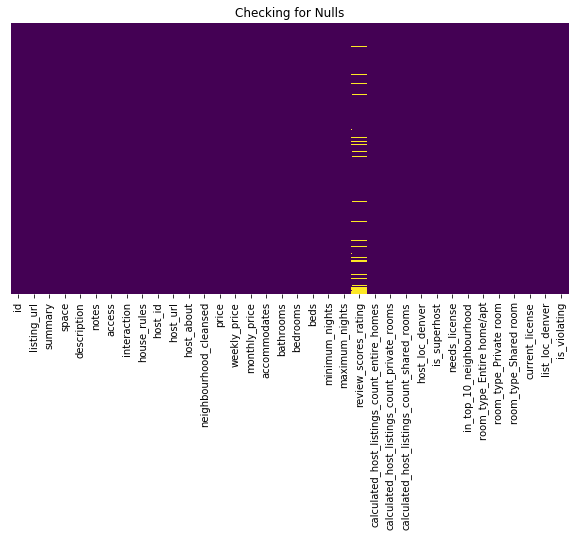

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(select_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Checking for Nulls')
#plt.savefig('../data/check-for-nulls.jpg')

In [60]:
select_df['review_scores_rating'].fillna(value=0, inplace=True)
select_df['bedrooms'].fillna(value=0, inplace=True)
select_df['bathrooms'].fillna(value=0, inplace=True)   
select_df['beds'].fillna(value=0, inplace=True)   

Text(0.5,1,'Confirming No More Nulls')

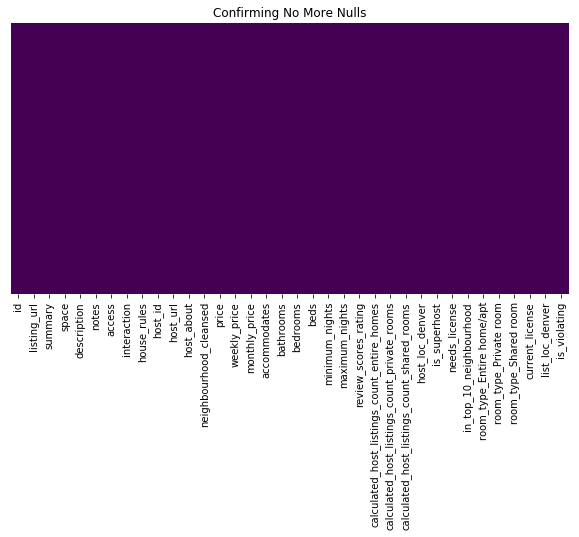

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(select_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Confirming No More Nulls')
#plt.savefig('../img/check-for-nulls-after.jpg')

## Interesting heatmap?

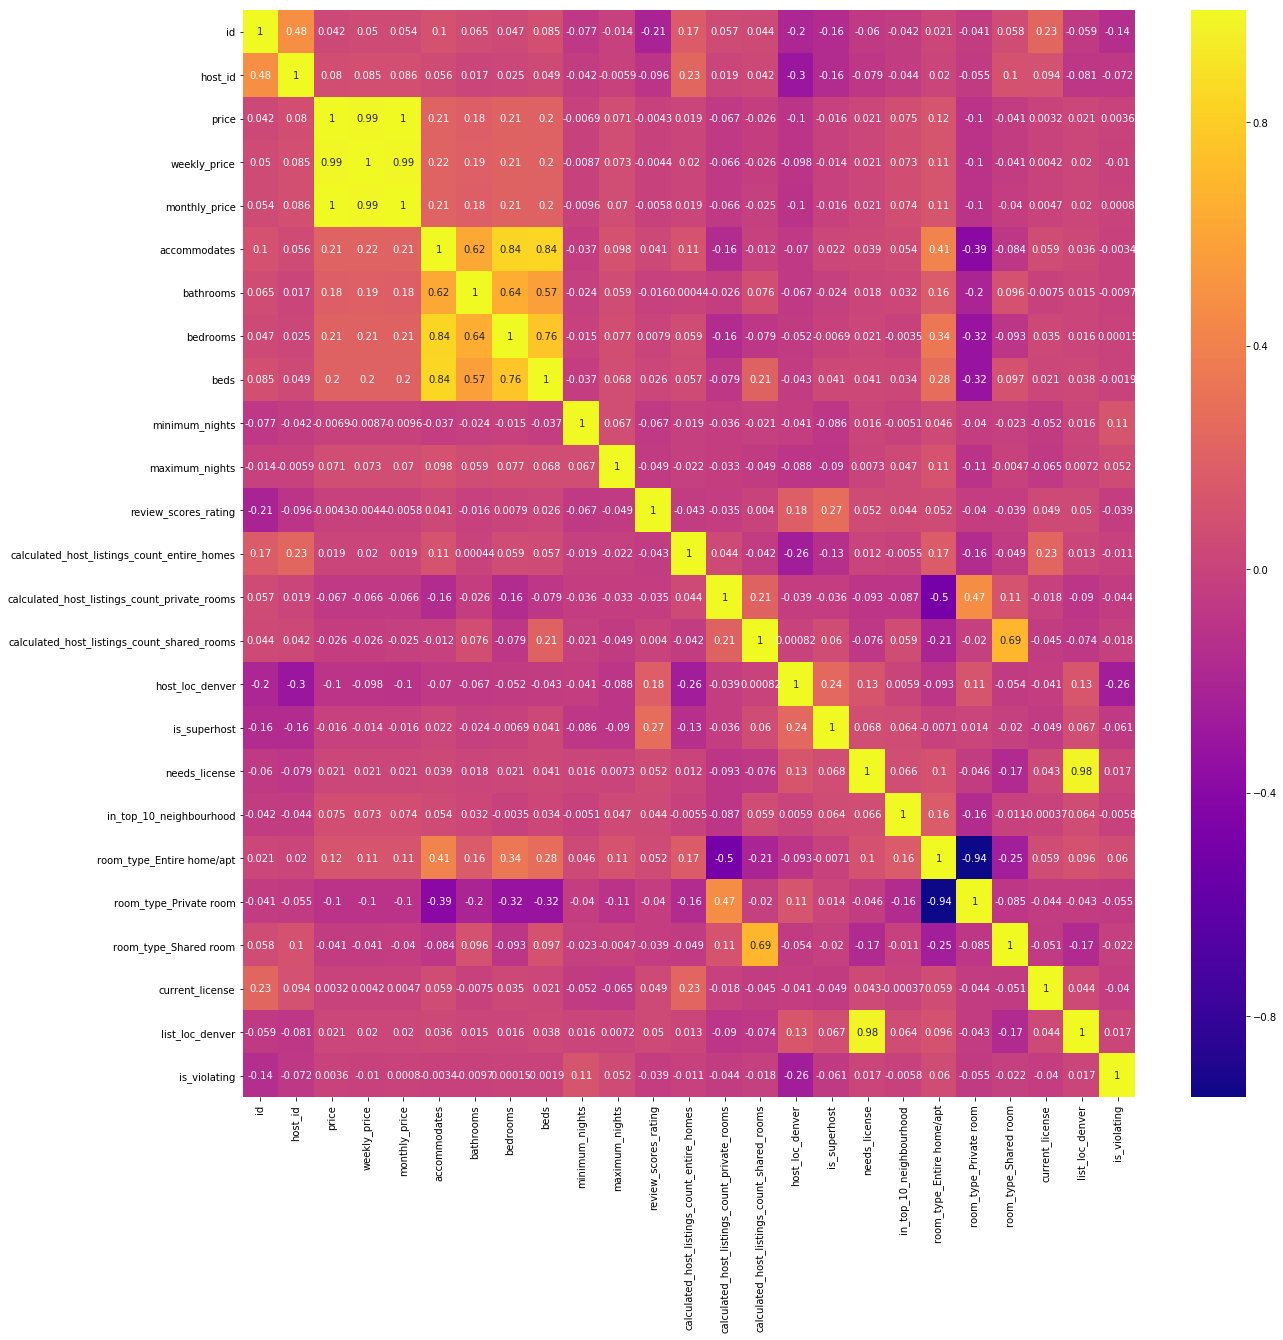

In [62]:
plt.figure(figsize=(20,20))
newdf=select_df.corr()
sns.heatmap(newdf, annot=True, cmap='plasma')
# plt.savefig('../data/correlation-heat-map.jpg')

## PCA

In [63]:
num_df = select_df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'bedrooms', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']]
num_df.shape

(4511, 22)

In [64]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [65]:
from sklearn.decomposition import PCA 

In [66]:
pca = PCA(n_components=5)
pca.fit_transform(num_df)

array([[ -456.48097814,  -557.37297266,    -7.10139023,    -9.82519098,
            5.26743724],
       [  746.03600658,  -399.17344181,    -6.70900346,   124.01976066,
          130.19981614],
       [-3442.86863472,  -275.79616598,   -63.86178587,    -8.61779997,
            4.13677619],
       ...,
       [ 1396.04374885,   533.16308633,    18.67325744,    56.18532682,
          -65.91383156],
       [-3597.07925467,   547.29996252,    36.56810818,    54.61058565,
          -67.39037741],
       [-4031.79989916,  -545.99141971,     5.8382351 ,    59.48927745,
          -66.69032811]])

In [67]:
pca_cov = pca.get_covariance
print(pca.explained_variance_ratio_)

[9.97453923e-01 1.71628138e-03 8.17755725e-04 5.22269243e-06
 4.60909186e-06]


In [68]:
print(pca.singular_values_)
pca.get_params

[865727.14041671  35911.11224878  24788.28085096   1980.98796247
   1860.98251774]


<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [69]:
pca.components_

array([[ 3.24509837e-02,  2.23700220e-01,  9.74113195e-01,
         4.73634174e-05,  1.26507368e-05,  1.79657327e-05,
         1.79657327e-05, -2.12484175e-05,  2.93672598e-03,
        -1.26294627e-05,  9.67994760e-06, -1.04081790e-05,
        -4.23790474e-06, -3.25850123e-06, -6.13556255e-07,
         1.84081746e-07,  2.81829252e-06,  3.87593126e-06,
        -3.41964600e-06, -4.56285261e-07,  1.18306481e-07,
         1.82910389e-07],
       [ 2.48085992e-04,  2.80719523e-02, -9.46824473e-03,
         4.48653182e-04,  7.88312807e-05,  1.32539158e-04,
         1.32539158e-04,  3.63628867e-03,  9.99550870e-01,
        -2.58703462e-03, -2.85090342e-04, -1.08204493e-04,
        -1.92095757e-04, -6.26338992e-05, -8.33883891e-05,
         1.25157166e-06,  3.81954814e-05,  8.23946326e-05,
        -8.18471368e-05, -5.47495813e-07, -4.03504820e-05,
         1.27194709e-06],
       [-1.14167366e-03, -9.74217104e-01,  2.23673244e-01,
        -2.16467358e-04, -1.20251011e-04, -8.30168588e-05,
    

## Monthly Price is weighed super heavily - going back to standardize the pricing

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
# scaled_features = select_df.copy()
col_names = ['price', 'weekly_price', 'monthly_price']
features = select_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
select_df[col_names] = features

In [72]:
# select_df[col_names] = features
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_about,neighbourhood_cleansed,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver,is_violating
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,We are a community of artists and tinkerers.\r...,Highland,-0.041735,-0.038141,-0.035113,5,1.0,2.0,2.0,1,29,100.0,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0,0.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"I travel pretty frequently, I spend a lot of t...",Five Points,0.051420,0.055809,0.058067,3,1.5,1.0,1.0,185,190,97.0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0,0.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,-0.230435,-0.246344,-0.268063,3,1.0,1.0,1.0,1,300,97.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,-0.275819,-0.273875,-0.291955,2,1.0,1.0,1.0,30,365,98.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver native, former teacher, musician, chapl...",North Capitol Hill,-0.208938,-0.206769,-0.252533,2,2.0,1.0,1.0,2,180,98.0,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0,0.0


## Back to PCA - round 2

In [73]:
num_df = select_df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']]
num_df.shape

(4511, 22)

In [74]:
from sklearn.decomposition import PCA 

In [75]:
pca = PCA(n_components=5)
pca.fit_transform(num_df)

array([[-5.58677172e+02, -9.81834022e+00,  5.38005815e+00,
         8.12741236e-01,  7.42203032e-01],
       [-3.97013305e+02,  1.23266596e+02,  1.31653545e+02,
        -3.88242623e-01, -6.50778756e-01],
       [-2.87673264e+02, -8.90477765e+00,  3.08483417e+00,
        -2.32422977e+00, -1.97060328e+00],
       ...,
       [ 5.37580019e+02,  5.66521329e+01, -6.54726784e+01,
        -9.82618069e-01,  3.66132551e-01],
       [ 5.37575206e+02,  5.51906264e+01, -6.68560345e+01,
        -1.71107825e+00,  3.56938294e+00],
       [-5.57420175e+02,  6.00309748e+01, -6.61616193e+01,
        -3.69765133e+00, -2.92012955e+00]])

In [76]:
pca_cov = pca.get_covariance
print(pca.explained_variance_ratio_)

[9.94105716e-01 3.01091704e-03 2.64965988e-03 1.43367688e-04
 4.17266765e-05]


In [77]:
print(pca.singular_values_)
pca.get_params

[35992.69010832  1980.83096638  1858.20269799   432.23871369
   233.18731352]


<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [78]:
pca.components_

array([[ 1.32245603e-04,  1.35721061e-04,  1.31306808e-04,
         5.23873598e-04,  9.82527105e-05,  1.61244939e-04,
         2.27061713e-04,  3.57823440e-03,  9.99989909e-01,
        -2.60889018e-03, -2.67952759e-04, -1.24676457e-04,
        -1.98064571e-04, -6.82482962e-05, -8.42742364e-05,
         1.54908944e-06,  4.27893498e-05,  8.83121946e-05,
        -8.70363438e-05, -1.27585072e-06, -3.99352757e-05,
         1.56710654e-06],
       [-2.60529289e-04, -3.06834009e-04, -2.90270614e-04,
        -6.05162177e-03, -3.39149784e-04, -8.68477806e-04,
        -2.97972723e-03,  7.15669642e-01, -4.37824088e-03,
        -6.98364077e-01,  4.09016299e-03,  9.47230867e-05,
        -1.01204871e-03, -2.00730236e-03, -4.00496092e-03,
        -9.76722741e-05, -6.18161037e-04, -1.78733600e-04,
         1.25647294e-04,  5.30863063e-05, -7.15569930e-04,
        -9.26975448e-05],
       [-3.29588969e-04, -3.80631262e-04, -4.39306996e-04,
         2.11141033e-04, -9.85174318e-04, -2.60293223e-04,
    

'maximum_nights' 

In [79]:
num_df.describe()

,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver
count,4.511000e+03,4.511000e+03,4.511000e+03,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000
mean,3.822160e-17,2.082499e-16,-2.731626e-16,4.342718,1.474396,1.700953,2.288849,6.264021,587.632454,87.836843,2.189093,0.759033,0.273110,0.781423,0.476391,0.986699,0.413212,0.731545,0.246730,0.021725,0.121924,0.986256
std,1.000111e+00,1.000111e+00,1.000111e+00,2.863880,0.893782,1.119232,1.796809,28.682761,535.946781,28.606691,6.429831,2.043163,2.162753,0.413327,0.499498,0.114572,0.492465,0.443205,0.431156,0.145799,0.327234,0.116440
min,-3.522545e-01,-3.513065e-01,-3.457130e-01,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.041607e-01,-2.033271e-01,-2.023593e-01,2.000000,1.000000,1.000000,1.000000,1.000000,29.000000,95.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.372796e-01,-1.344995e-01,-1.306824e-01,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,98.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.259699e-03,4.025751e-04,-1.122094e-02,6.000000,2.000000,2.000000,3.000000,2.000000,1125.000000,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.350756e+01,2.371186e+01,2.352030e+01,18.000000,17.000000,9.000000,24.000000,1124.000000,1825.000000,100.000000,52.000000,22.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Standardize Min/Max nights

In [80]:
col_names = ['minimum_nights', 'maximum_nights']
features = select_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
select_df[col_names] = features

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
select_df.head()

,id,listing_url,summary,space,description,notes,access,interaction,house_rules,host_id,host_url,host_about,neighbourhood_cleansed,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver,is_violating
0,360,https://www.airbnb.com/rooms/360,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,WIFI: Once you have arrived you can find the...,"Chickadee is the main the main property, sever...",We live on the property in the green house dir...,NUMBER ONE HOUSE RULE: please let us know ASAP...,666,https://www.airbnb.com/users/show/666,We are a community of artists and tinkerers.\r...,Highland,-0.041735,-0.038141,-0.035113,5,1.0,2.0,2.0,-0.183546,-1.042444,100.0,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0,0.0
1,364,https://www.airbnb.com/rooms/364,"Modern 1,000 square foot loft in the heart of ...","BRAND NEW FOR 2016 - April 22, 2016 - the air...","Modern 1,000 square foot loft in the heart of ...",Not 420 (Website hidden by Airbnb) marijuana use.,Full access to whole house. Completely keyles...,none,NOT 420 Friendly. If that's what you're after...,783,https://www.airbnb.com/users/show/783,"I travel pretty frequently, I spend a lot of t...",Five Points,0.051420,0.055809,0.058067,3,1.5,1.0,1.0,6.232168,-0.742008,97.0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0,0.0
2,590,https://www.airbnb.com/rooms/590,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",Denver (and Colorado) now impose lodging tax o...,You may make yourselves at home in all public ...,I am happy to interact as much or as little as...,none,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,-0.230435,-0.246344,-0.268063,3,1.0,1.0,1.0,-0.183546,-0.536740,97.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0,0.0
3,592,https://www.airbnb.com/rooms/592,This room is in the basement. It does not hav...,This is a basement room. You can sometimes he...,This room is in the basement. It does not hav...,Denver (and Colorado) now impose lodging tax o...,Access to all public parts of the house - kitc...,I'm happy to interact with you if you wish. O...,No smoking in or near the house. I prefer n...,933,https://www.airbnb.com/users/show/933,I am friendly and I love meeting people from a...,North Park Hill,-0.275819,-0.273875,-0.291955,2,1.0,1.0,1.0,0.827626,-0.415446,98.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0,0.0
4,686,https://www.airbnb.com/rooms/686,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,My STR license with the City and County of Den...,"Living room, dining room, kitchen, refrigerato...",I generally have a great deal of interaction w...,No smoking or vaping. No pets. If kitchen is u...,990,https://www.airbnb.com/users/show/990,"Denver native, former teacher, musician, chapl...",North Capitol Hill,-0.208938,-0.206769,-0.252533,2,2.0,1.0,1.0,-0.148678,-0.760668,98.0,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0,0.0


## PCA Round 3

In [82]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(num_df)
type(principalComponents)

numpy.ndarray

In [83]:
principalComponents

array([[-5.58677172e+02, -9.81834022e+00,  5.38005815e+00,
         8.12741236e-01,  7.42203031e-01],
       [-3.97013305e+02,  1.23266596e+02,  1.31653545e+02,
        -3.88242623e-01, -6.50778757e-01],
       [-2.87673264e+02, -8.90477765e+00,  3.08483417e+00,
        -2.32422977e+00, -1.97060328e+00],
       ...,
       [ 5.37580019e+02,  5.66521329e+01, -6.54726784e+01,
        -9.82618069e-01,  3.66132550e-01],
       [ 5.37575206e+02,  5.51906264e+01, -6.68560345e+01,
        -1.71107825e+00,  3.56938294e+00],
       [-5.57420175e+02,  6.00309748e+01, -6.61616193e+01,
        -3.69765133e+00, -2.92012955e+00]])

In [84]:
principalComponents.shape

(4511, 5)

In [85]:
pc2 = principalComponents[:2]
pc2

array([[-5.58677172e+02, -9.81834022e+00,  5.38005815e+00,
         8.12741236e-01,  7.42203031e-01],
       [-3.97013305e+02,  1.23266596e+02,  1.31653545e+02,
        -3.88242623e-01, -6.50778757e-01]])

In [86]:
pca_cov = pca.get_covariance
print(pca.explained_variance_ratio_)

[9.94105716e-01 3.01091704e-03 2.64965988e-03 1.43367688e-04
 4.17266765e-05]


In [87]:
print(pca.singular_values_)
pca.get_params

[35992.69010832  1980.83096638  1858.20269799   432.23871369
   233.18731352]


<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [88]:
pca.components_

array([[ 1.32245603e-04,  1.35721061e-04,  1.31306808e-04,
         5.23873598e-04,  9.82527105e-05,  1.61244939e-04,
         2.27061713e-04,  3.57823440e-03,  9.99989909e-01,
        -2.60889018e-03, -2.67952759e-04, -1.24676457e-04,
        -1.98064571e-04, -6.82482962e-05, -8.42742364e-05,
         1.54908944e-06,  4.27893498e-05,  8.83121946e-05,
        -8.70363438e-05, -1.27585072e-06, -3.99352757e-05,
         1.56710654e-06],
       [-2.60529289e-04, -3.06834009e-04, -2.90270614e-04,
        -6.05162177e-03, -3.39149784e-04, -8.68477806e-04,
        -2.97972723e-03,  7.15669642e-01, -4.37824088e-03,
        -6.98364077e-01,  4.09016299e-03,  9.47230867e-05,
        -1.01204871e-03, -2.00730236e-03, -4.00496092e-03,
        -9.76722741e-05, -6.18161037e-04, -1.78733600e-04,
         1.25647294e-04,  5.30863063e-05, -7.15569930e-04,
        -9.26975448e-05],
       [-3.29588969e-04, -3.80631262e-04, -4.39306996e-04,
         2.11141033e-04, -9.85174318e-04, -2.60293223e-04,
    

## Visualize the Data

In [89]:
num_df.head()

,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver
0,-0.041735,-0.038141,-0.035113,5,1.0,2.0,2.0,1,29,100.0,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0
1,0.051420,0.055809,0.058067,3,1.5,1.0,1.0,185,190,97.0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0
2,-0.230435,-0.246344,-0.268063,3,1.0,1.0,1.0,1,300,97.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
3,-0.275819,-0.273875,-0.291955,2,1.0,1.0,1.0,30,365,98.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
4,-0.208938,-0.206769,-0.252533,2,2.0,1.0,1.0,2,180,98.0,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0


## Plot PCA - n_components = 5, plotting first 2

In [90]:
from sklearn.preprocessing import StandardScaler

features = ['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']

# Separating out the features
x = num_df.loc[:, features].values

# Separating out the target
y = select_df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4', 'principal component 5'])

In [92]:
pcaDf = pd.concat([principalDf, select_df[['is_violating']]], axis = 1)

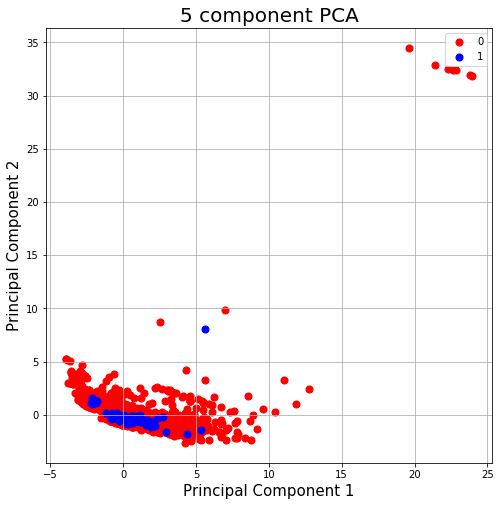

In [93]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('5 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['is_violating'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [94]:
pca.explained_variance_ratio_

array([0.19364111, 0.11671256, 0.10479802, 0.08612199, 0.07094041])

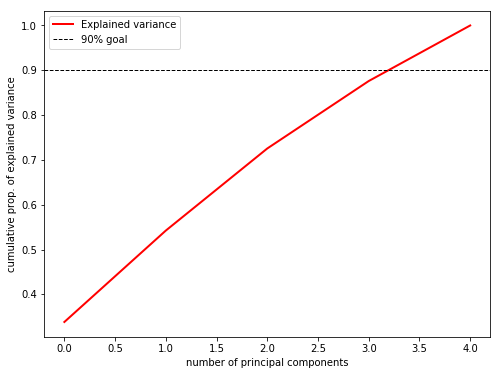

In [95]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

## VIF

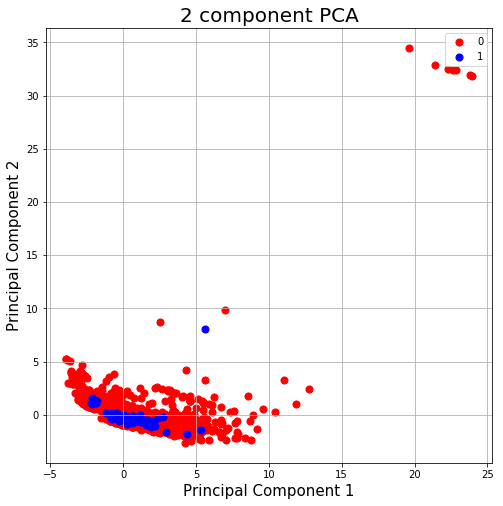

In [96]:
from sklearn.preprocessing import StandardScaler

features = ['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']

# Separating out the features
x = num_df.loc[:, features].values

# Separating out the target
y = select_df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pcaDf = pd.concat([principalDf, select_df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['is_violating'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [97]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.tools.tools import add_constant

X = num_df[features]
X['intercept']=1
# X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
y = select_df['is_violating']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values('VIF Factor')

/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
22,0.000000,intercept
7,1.028275,minimum_nights
8,1.049514,maximum_nights
16,1.061042,in_top_10_neighbourhood
20,1.076112,current_license
9,1.112405,review_scores_rating
14,1.163999,is_superhost
10,1.193175,calculated_host_listings_count_entire_homes
13,1.194980,host_loc_denver
11,1.432626,calculated_host_listings_count_private_rooms


In [98]:
num_df.head()

,price,weekly_price,monthly_price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_loc_denver,is_superhost,needs_license,in_top_10_neighbourhood,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,current_license,list_loc_denver
0,-0.041735,-0.038141,-0.035113,5,1.0,2.0,2.0,1,29,100.0,3,0,0,1.0,1.0,1.0,1.0,1,0,0,0.0,1.0
1,0.051420,0.055809,0.058067,3,1.5,1.0,1.0,185,190,97.0,1,0,0,1.0,0.0,1.0,1.0,1,0,0,0.0,1.0
2,-0.230435,-0.246344,-0.268063,3,1.0,1.0,1.0,1,300,97.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
3,-0.275819,-0.273875,-0.291955,2,1.0,1.0,1.0,30,365,98.0,0,2,0,1.0,1.0,1.0,0.0,0,1,0,0.0,1.0
4,-0.208938,-0.206769,-0.252533,2,2.0,1.0,1.0,2,180,98.0,0,2,0,1.0,0.0,1.0,0.0,0,1,0,0.0,1.0


## PCA w/ fewer categoricals

In [129]:
from sklearn.preprocessing import StandardScaler 
# 'weekly_price', 'monthly_price

features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the features
x = few_cat_df.loc[:, features].values

# Separating out the target
y = select_df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4', 
                          'principal component 5'])

<IPython.core.display.Javascript object>


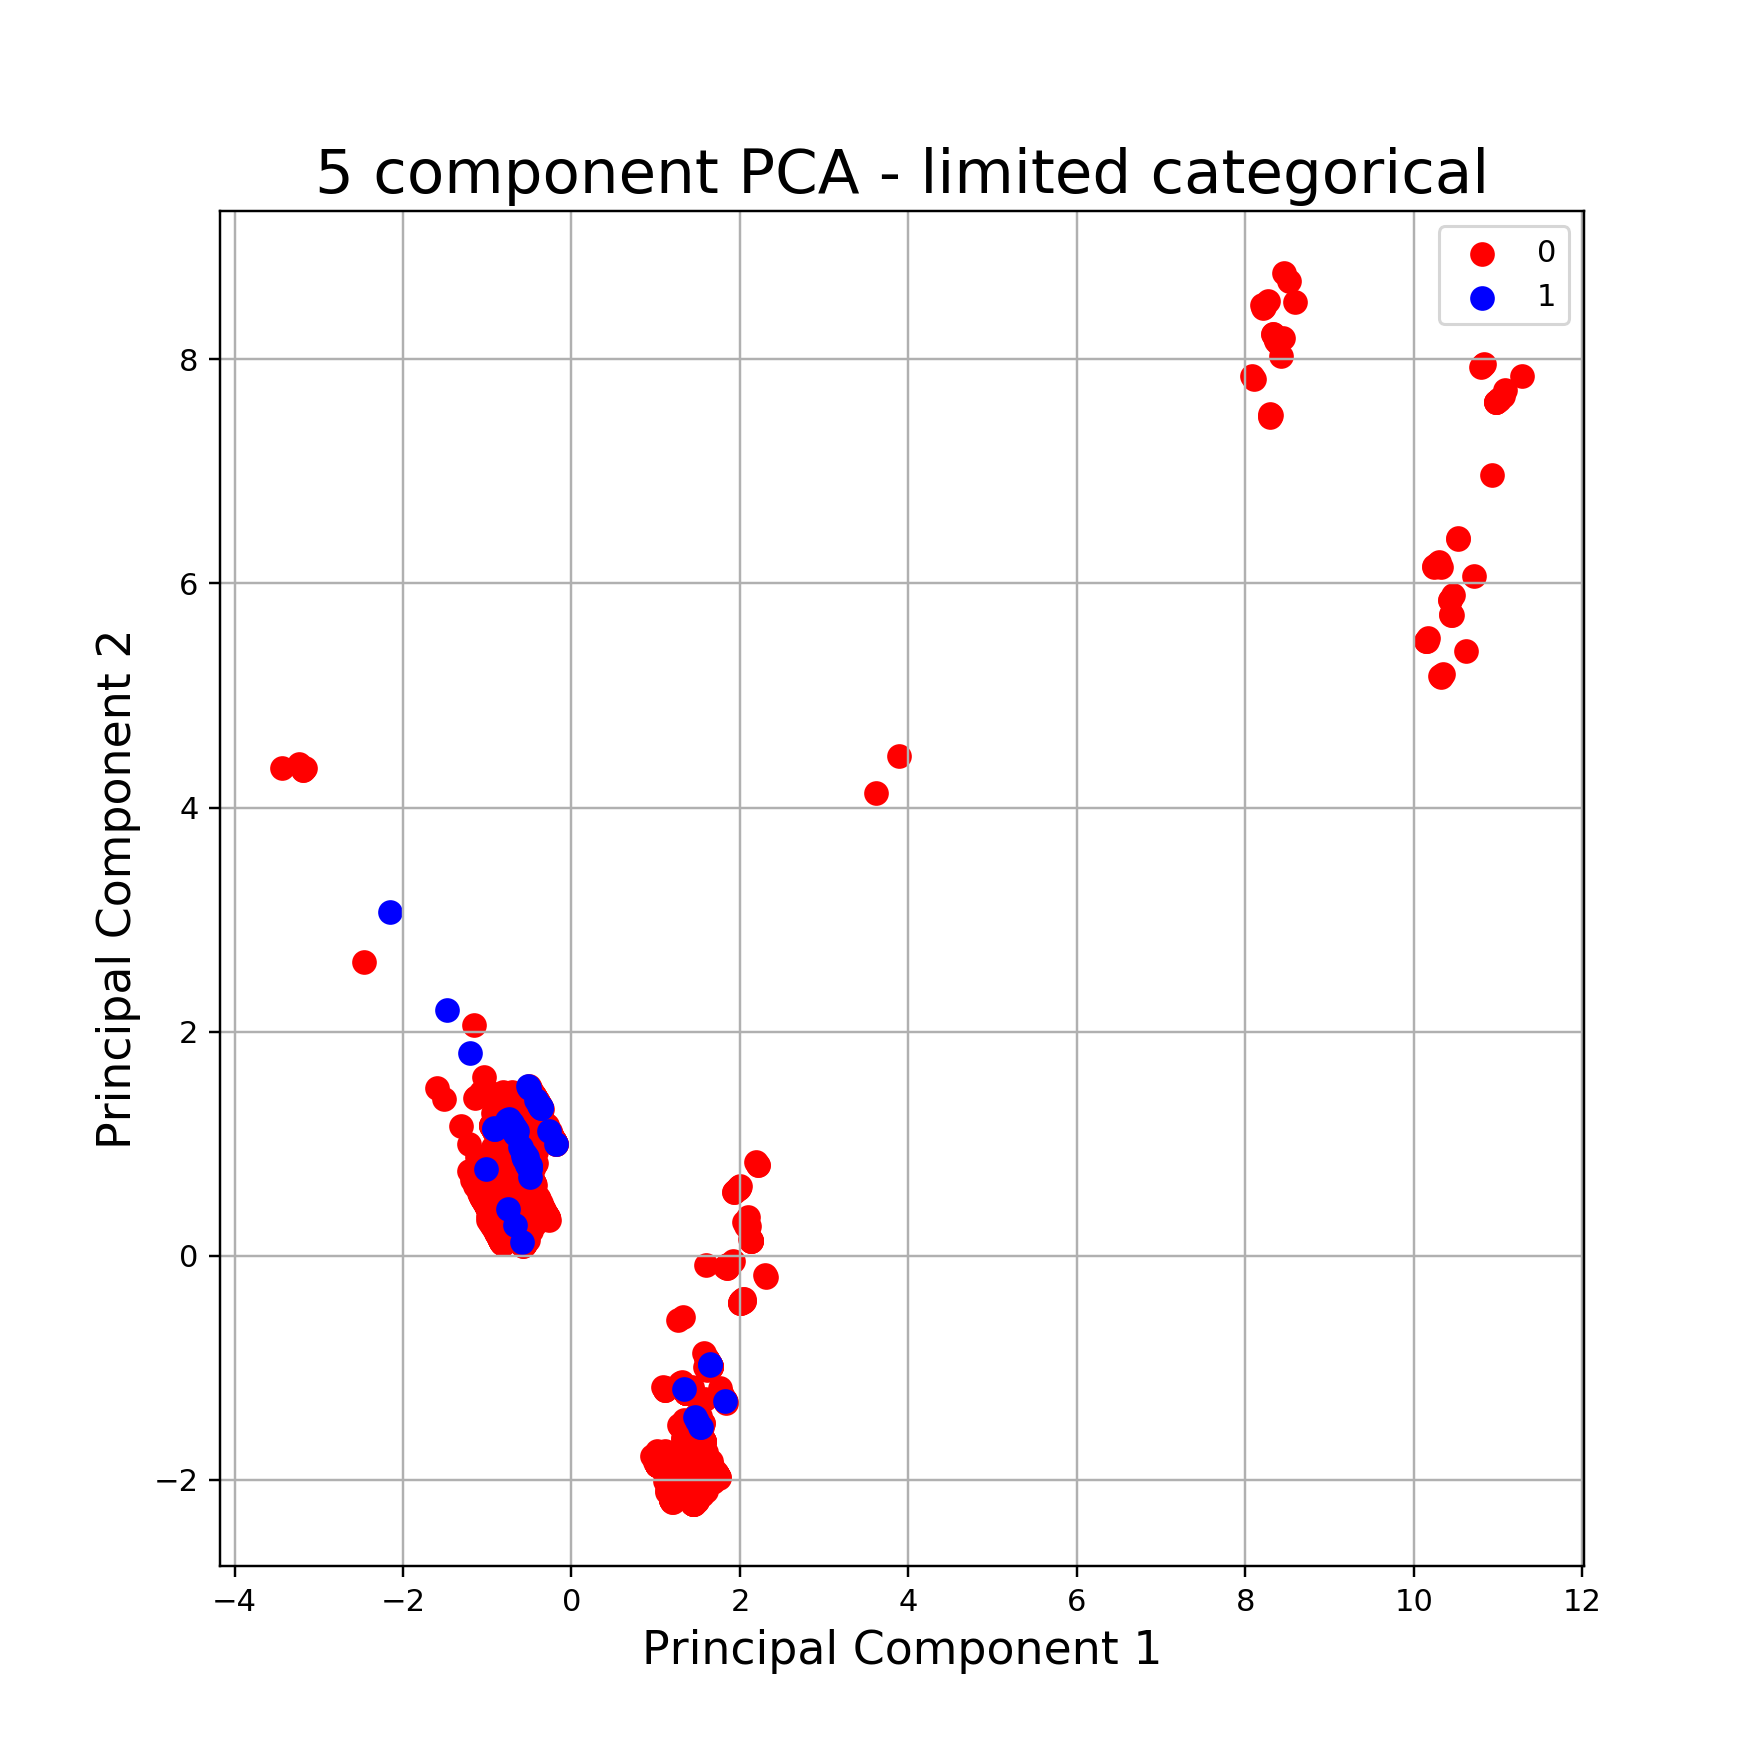

In [131]:
pcaDf = pd.concat([principalDf, select_df[['is_violating']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('5 component PCA - limited categorical', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['is_violating'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

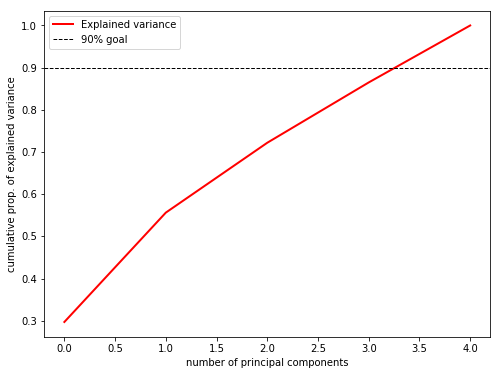

In [102]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();

In [103]:
pca.explained_variance_

array([2.21237596, 1.92993254, 1.23290343, 1.06439845, 1.00537038])

In [104]:
pca.explained_variance_ratio_

array([0.2010805 , 0.17540952, 0.11205728, 0.09674204, 0.09137705])

In [105]:
pca.components_

array([[-0.10668641, -0.04332366, -0.08324878, -0.08683635, -0.03592916,
        -0.51378861, -0.47110296,  0.40967615,  0.22058175, -0.08011873,
        -0.51200844],
       [ 0.13679071,  0.05603011,  0.15294766, -0.06683267, -0.27714377,
        -0.42473046,  0.48078713, -0.52255414,  0.08378176,  0.00562158,
        -0.42639726],
       [ 0.1843598 ,  0.3702952 ,  0.39798342, -0.57713356, -0.42516694,
         0.15019567, -0.14795815,  0.12953628,  0.06670393, -0.26060751,
         0.15184326],
       [-0.32725191,  0.36241737,  0.21790086,  0.20771961,  0.44171119,
        -0.0290155 ,  0.06893153, -0.11763205,  0.13832035, -0.66059317,
        -0.02960116],
       [ 0.39347993,  0.1724829 ,  0.20401377,  0.19426012,  0.12667677,
        -0.15819257,  0.02025279,  0.24204911, -0.77735026, -0.07682315,
        -0.16068456]])

## 3D Map Visualization

In [133]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


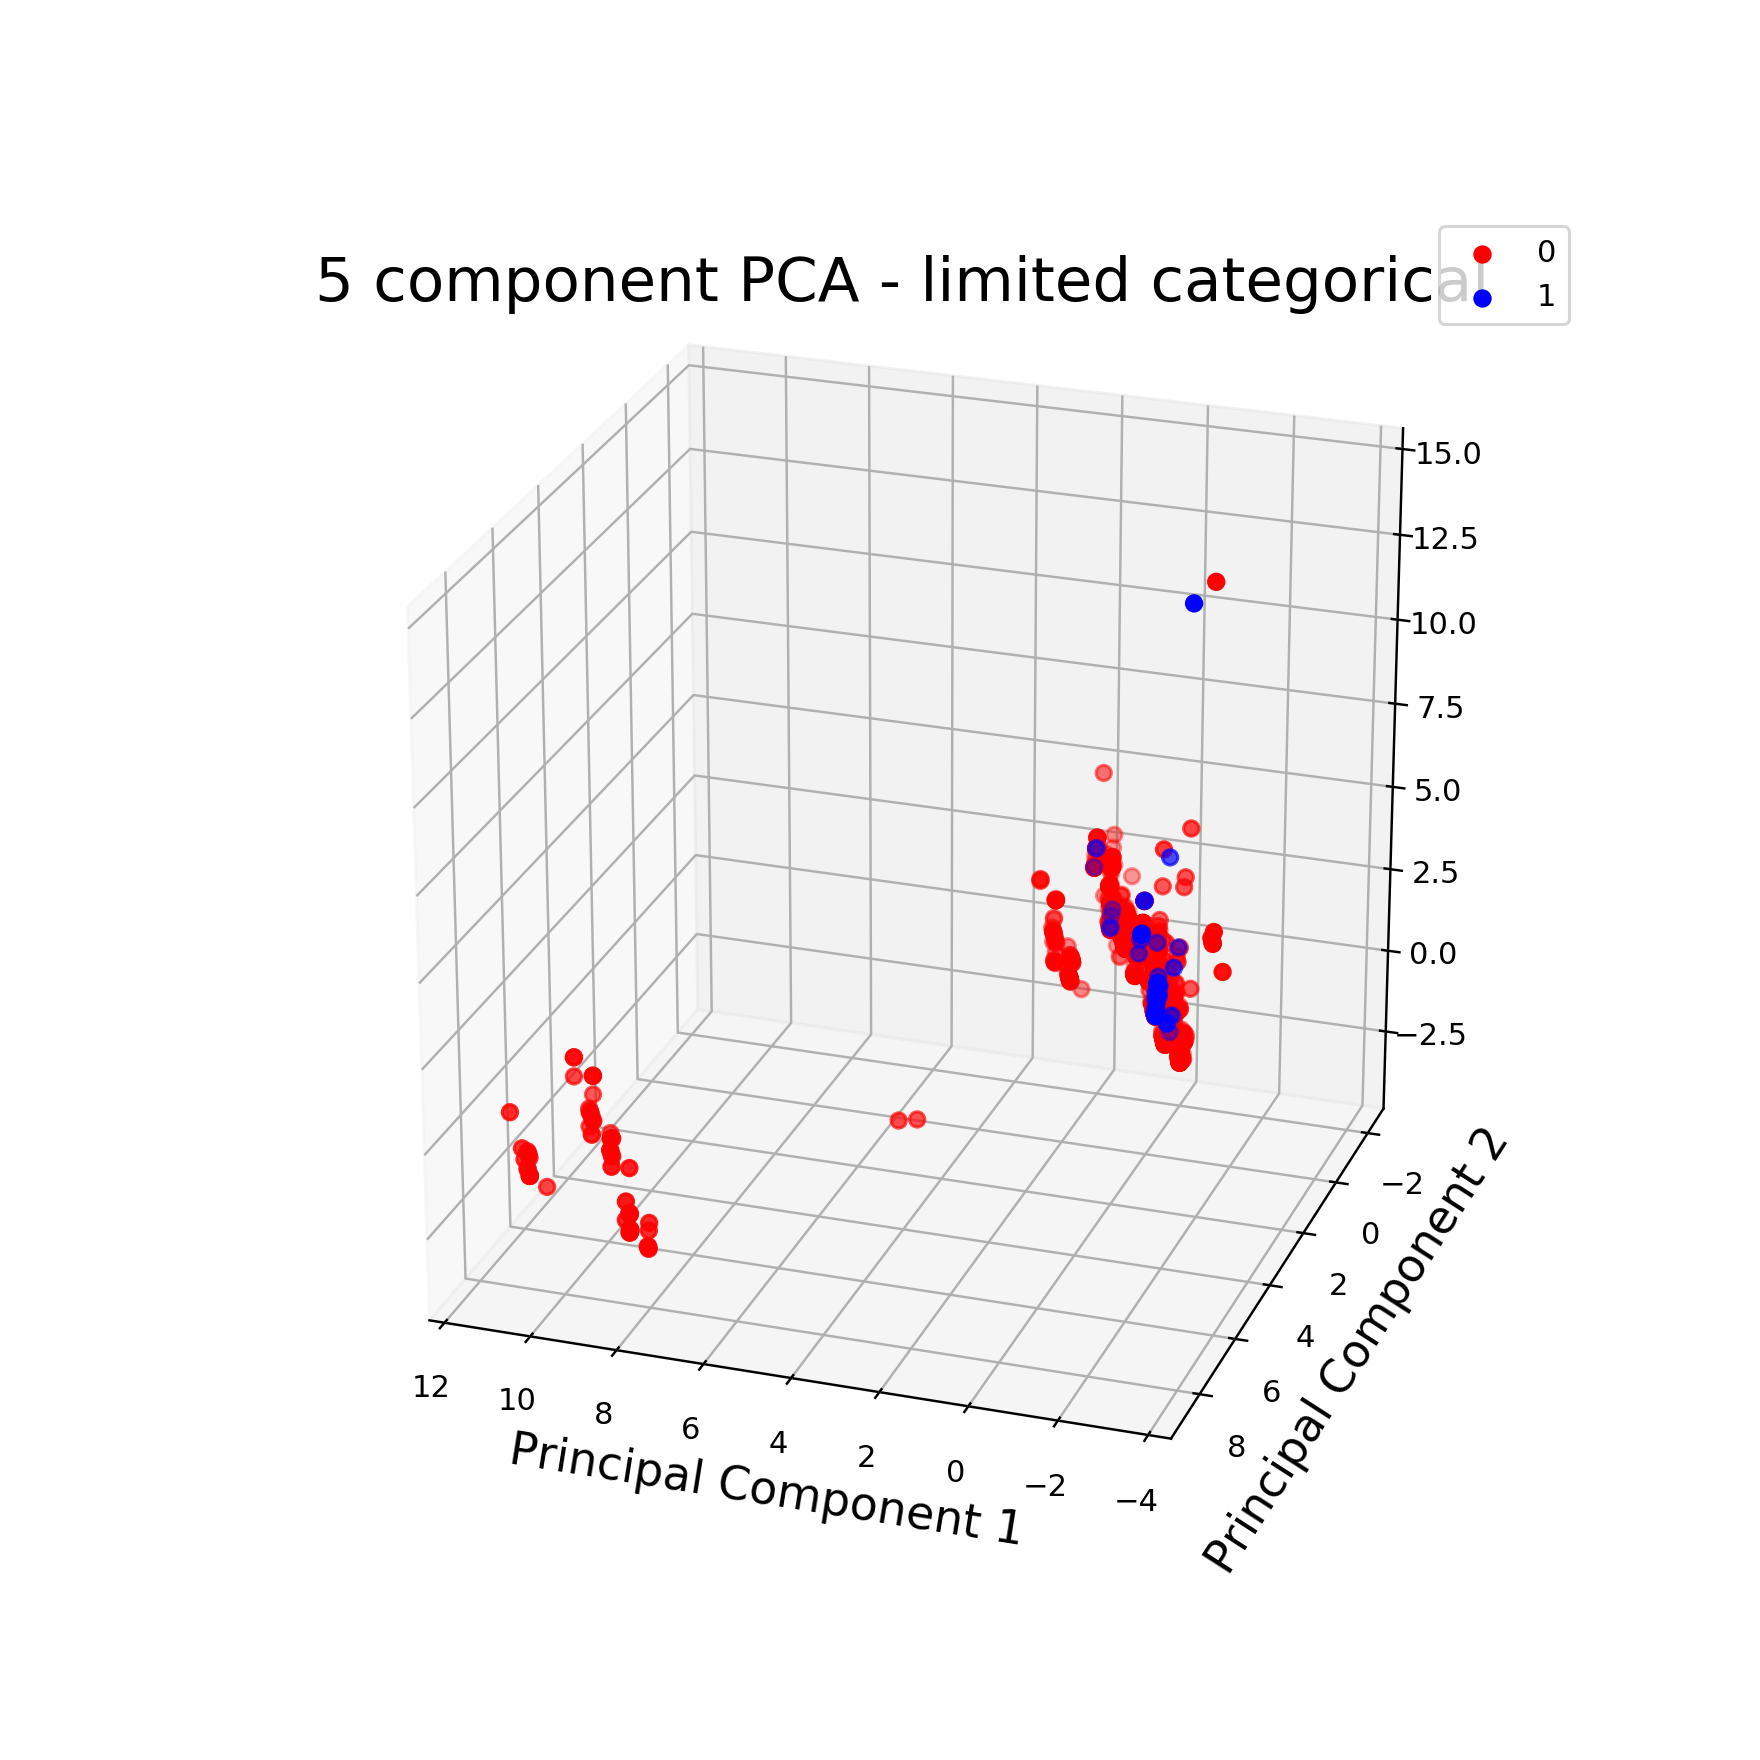

In [134]:
features = ['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']

# Separating out the features
x = num_df.loc[:, features].values

# Separating out the target
y = select_df.loc[:,['is_violating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4', 
                          'principal component 5'])

pcaDf = pd.concat([principalDf, select_df[['is_violating']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('5 component PCA - limited categorical', fontsize = 20)
targets = [0,1]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pcaDf['is_violating'] == target
    ax.scatter(pcaDf.loc[indicesToKeep, 'principal component 1']
               , pcaDf.loc[indicesToKeep, 'principal component 2']
               , pcaDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 25)
ax.legend(targets)
ax.grid()


## Kmeans w/ 3 PCA

In [108]:
from sklearn.cluster import KMeans

In [109]:
kmeans = KMeans()
kmeans.fit(pcaDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
print("\n2) Cluster Centers:")
print(kmeans.cluster_centers_)


2) Cluster Centers:
[[ 1.34744114e+00 -2.06295839e+00 -8.18572378e-02 -2.95019182e-02
   4.45834434e-01  1.14491749e-16]
 [-6.91214634e-01  3.14231612e-01 -4.55832225e-01  6.22747640e-01
   1.17505808e-01  1.47058824e-03]
 [ 9.78814274e+00  7.05850003e+00 -1.59456920e+00  2.65944588e-01
   1.36952212e+00  2.08166817e-17]
 [-7.76911021e-01  5.82350984e-01 -7.25602058e-01 -1.54089246e+00
  -3.27241113e-01  2.77777778e-02]
 [ 1.99177358e+00 -1.72395234e-02  8.71524640e-01  1.02200774e+00
  -5.59633598e+00  2.08166817e-17]
 [-5.79825776e-01  1.03657840e+00  1.51623990e+00 -2.91444382e-01
  -1.79750370e-01  1.01978691e-01]
 [-2.93537160e+00  4.02375007e+00  5.30662536e+00 -8.28866149e+00
   9.28149937e+00  0.00000000e+00]
 [ 1.53258381e+00 -1.43640500e+00  1.89941456e+00 -9.74098570e-01
   4.91999952e-03  3.72093023e-02]]


## Medium PCA > Kmeans

In [111]:
# # Imports
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# %config InlineBackend.figure_format='retina'

# # Load in the data

# # Standardize the data to have a mean of ~0 and a variance of 1
# X_std = StandardScaler().fit_transform(num_df)

# # Create a PCA instance: pca
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X_std)


<IPython.core.display.Javascript object>


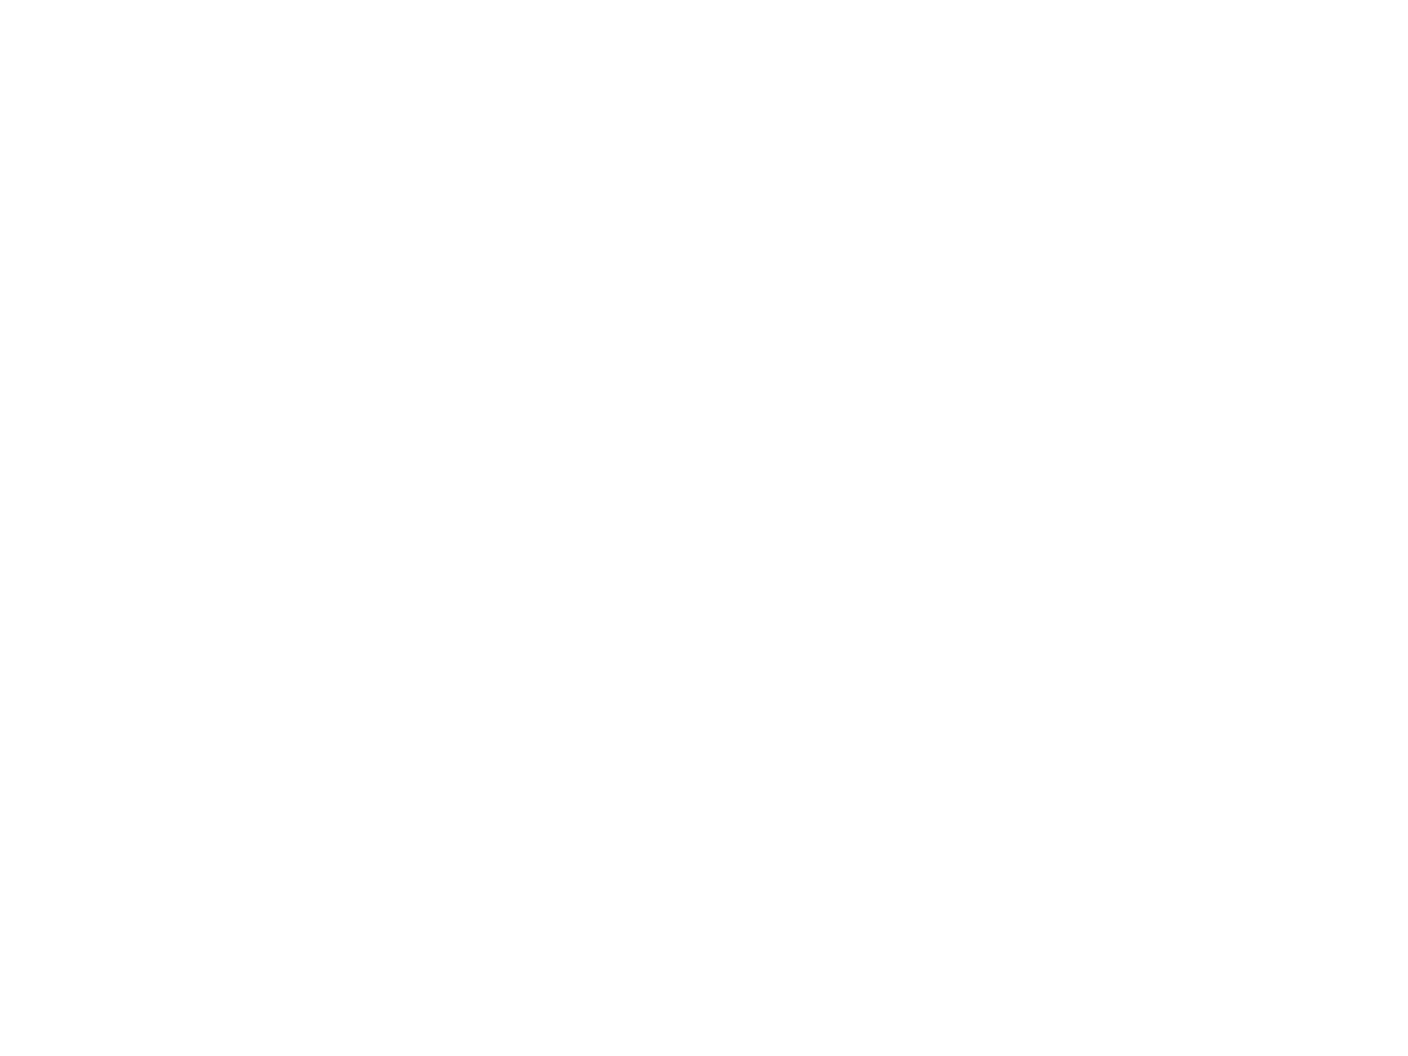

<IPython.core.display.Javascript object>


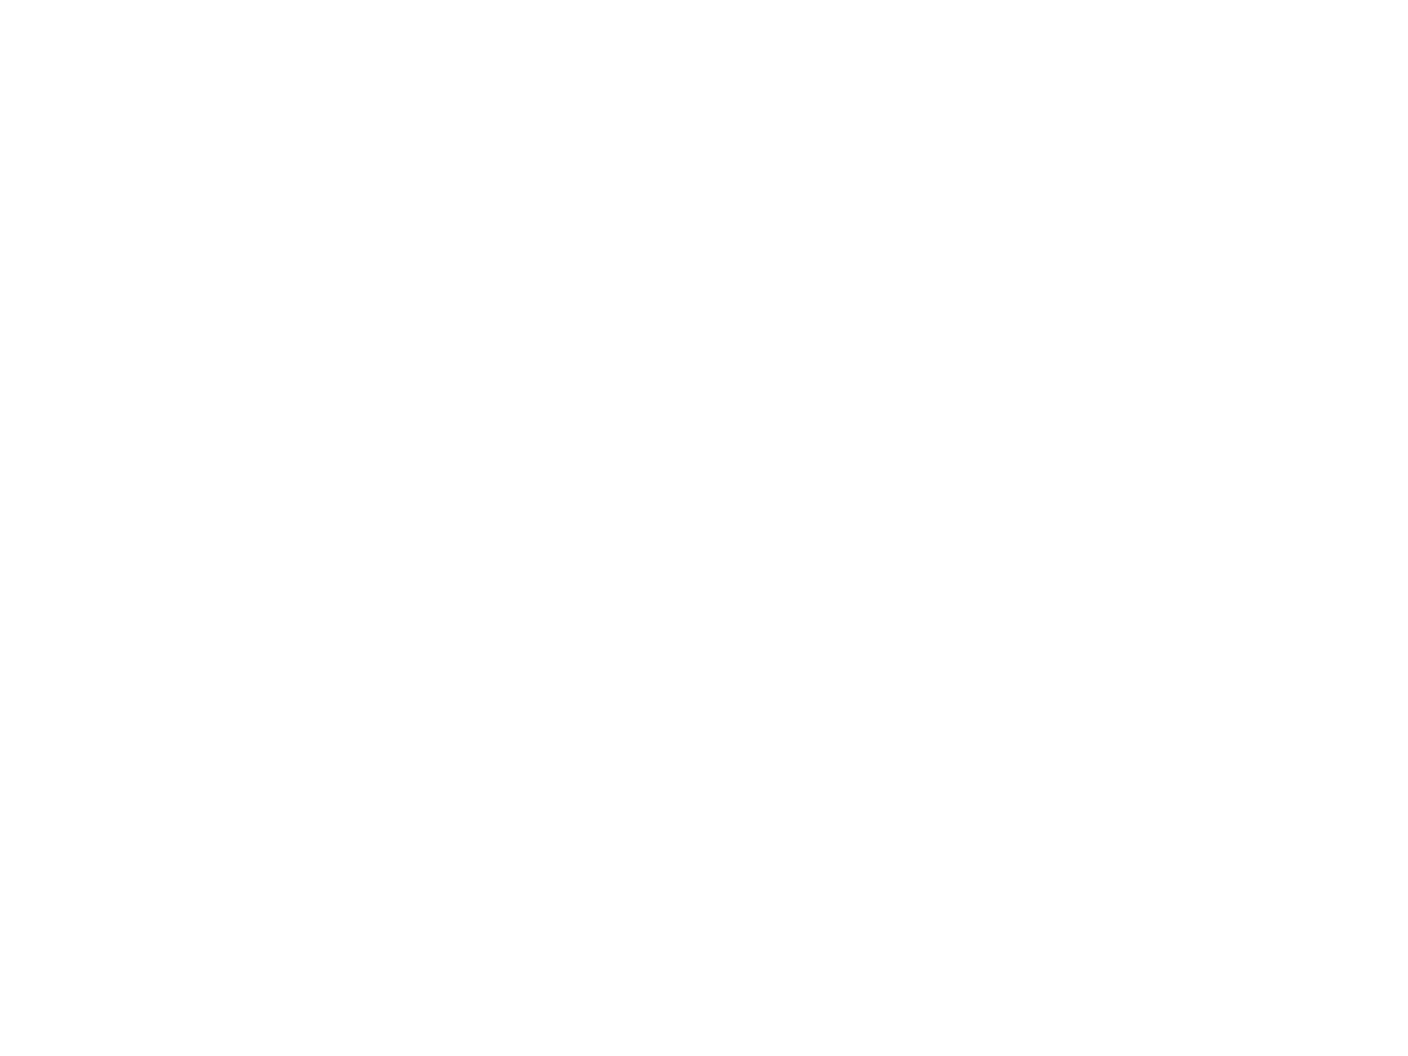

In [112]:
# # Plot the explained variances
# features = range(pca.n_components_)

# fig = plt.figure()
# plt.figure()
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features);

In [113]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

<IPython.core.display.Javascript object>


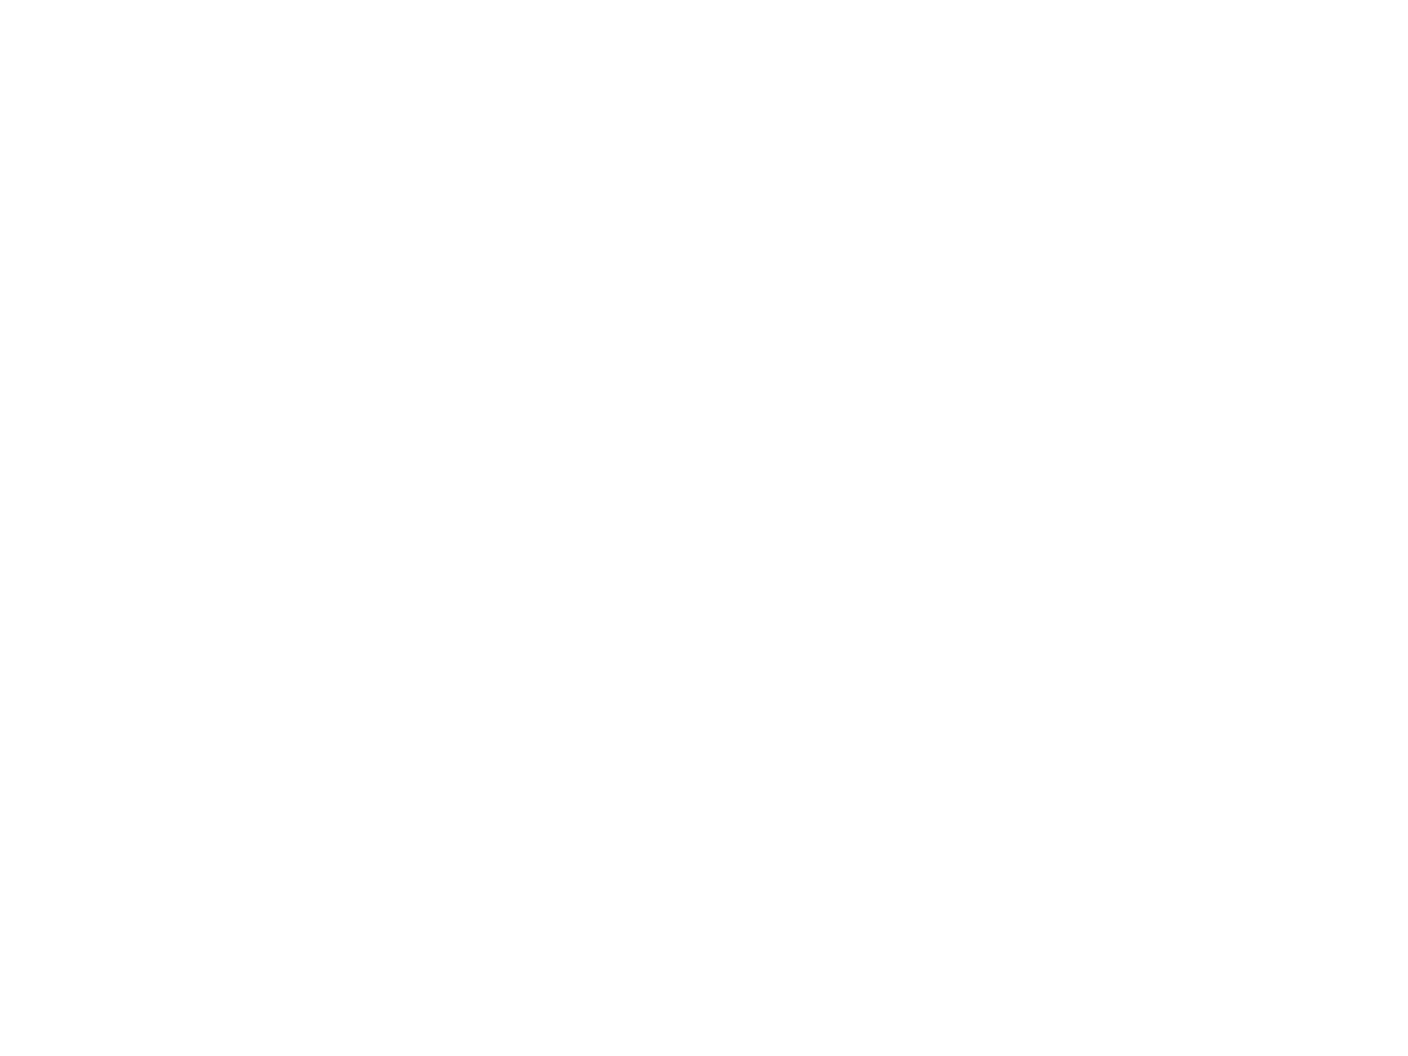

Text(0,0.5,'PCA 2')

In [114]:
plt.figure()
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

<IPython.core.display.Javascript object>


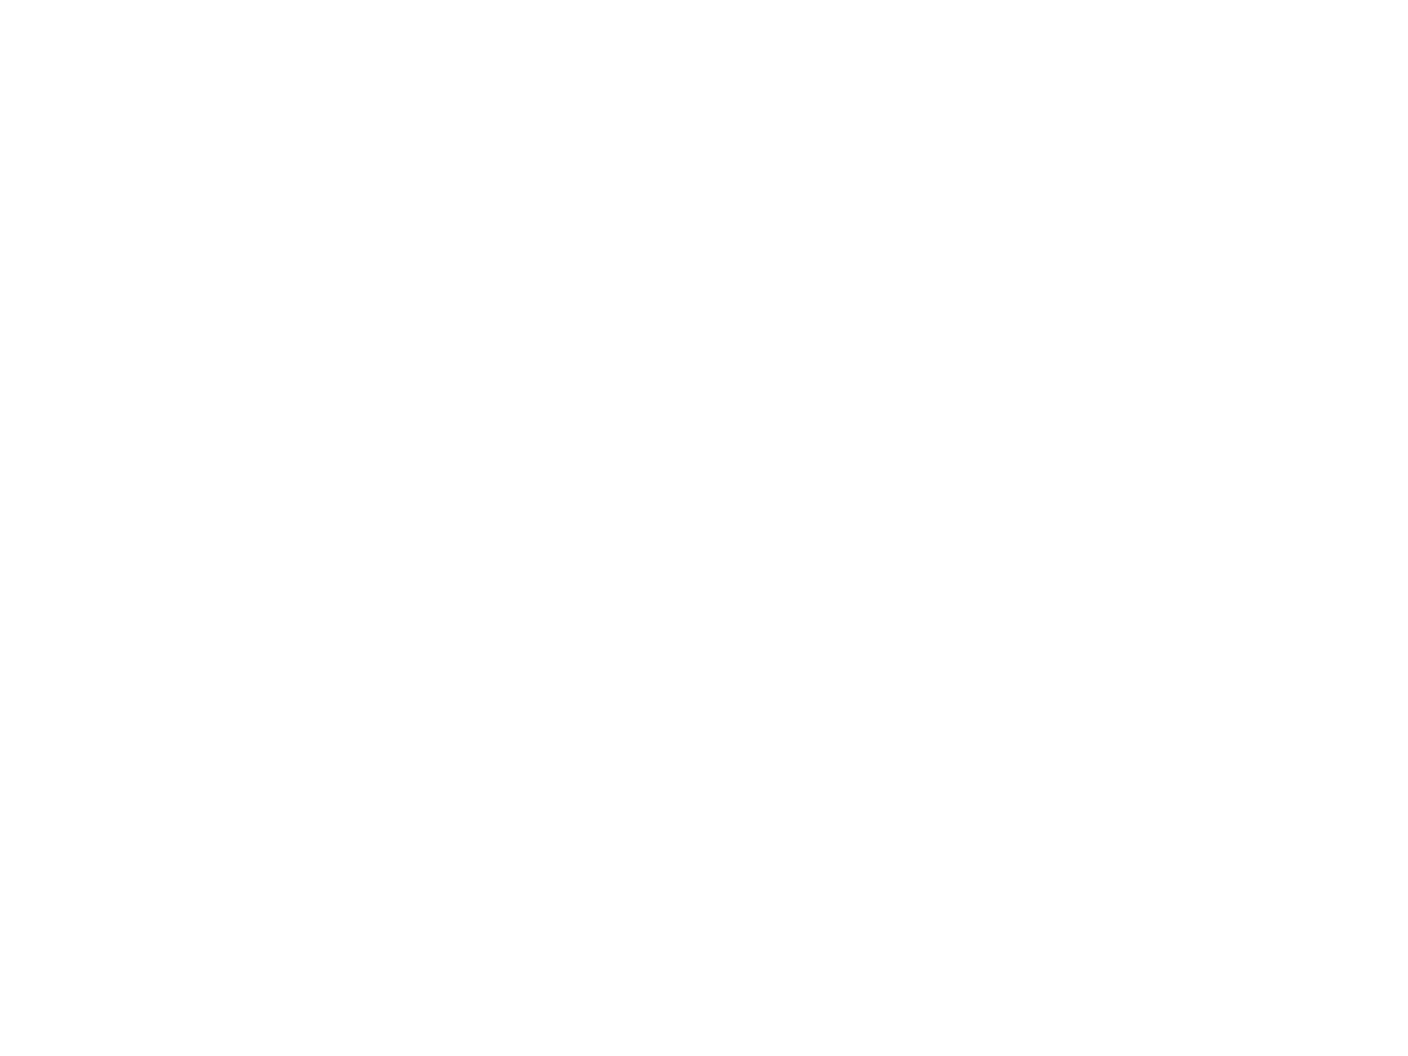

In [115]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.figure()
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Kmeans + PCA w/ 

In [116]:
num_all_df = select_df[['price', 'weekly_price', 'monthly_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
'maximum_nights', 'review_scores_rating', 'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_loc_denver',
'is_superhost', 'needs_license', 'in_top_10_neighbourhood', 'room_type_Entire home/apt', 'room_type_Private room',
'room_type_Shared room', 'current_license', 'list_loc_denver']]

In [128]:
few_cat_df = select_df[['price', 'minimum_nights', 'maximum_nights','review_scores_rating',
            'host_loc_denver', 'needs_license','room_type_Entire home/apt', 
            'room_type_Private room','room_type_Shared room', 'current_license', 
            'list_loc_denver']]

In [120]:
kmeans = KMeans(n_clusters=5)

In [121]:
kmeans.fit(principalComponents)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
select_df[['is_violating']].shape

(4511, 1)

In [124]:
principalComponents.shape

(4511, 20)